# Diversity trumps ability? Diversity equals ability
## Replicating Hong and Page's analysis in new framework
### Code for visualizing the results of the simulations
This Jupyter Notebook contains the code for visualizing the results of simulations and thereby test whether diversity trumps ability. 

## 1. Initialization

### Imports

In [2]:
%run utils/notebook.py

### Basic functions

In [3]:
def df_all(date: str = "", rename=True):
    files = [file for file in os.listdir("data") if file[:10] == "simulation" and date in file]
    df_dummy = pd.read_csv(f"data/{files[0]}")
    df = pd.DataFrame(columns = df_dummy.columns, dtype=float)  # Todo: I added dtype to 
    for file in files:
        df_new = pd.read_csv(f"data/{file}")
        df = pd.concat([df, df_new], ignore_index=True)
    if rename:
        mapper = lambda x : x.replace("most_diverse", "diverse").replace("accuracy_precision", "precision")
        columns_dict = {
            k: mapper(k) for k in list(df.columns)
        }
        df.rename(columns_dict, axis= 'columns', inplace=True)
    return df


def produce_df_group(df: pd.DataFrame, group_type: str):
    columns_new = [
        column for column in df.columns 
        if column.split("_")[0] not in group_types or column.split("_")[0] == group_type
    ]
    df_new = df[columns_new]
    def convert(string: str):
        output = string
        if string.split("_")[0] in group_types:
            output = string.replace(string.split("_")[0]+"_", "")
        return output
    rename_columns: dict = [convert(column) for column in columns_new]
    df_new.columns = rename_columns
    df_new.insert(1, "group_type", group_type)
    return df_new


def produce_df_groups(group_types):
    df_list = []
    for group_type in group_types:
        df_list.append(produce_df_group(df, group_type))
    return pd.concat(df_list, ignore_index=True)

### Check

In [4]:
# @hidden_cell
# Optional: If you want to analyse one specific simulation
list_of_files = glob.glob('data/*.csv') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)
df = pd.read_csv(latest_file)
df.describe()

data\sim_groups_20231101.csv


,Unnamed: 0,community_number,group_size,number_of_sources,source_degree,number_of_voting_simulations,number_of_agents,difficulty,accuracy,precision,diversity,average
count,14469.000000,14469.000000,14469.000000,14469.000000,14469.0,14469.000000,14469.0,14469.000000,14469.000000,14469.000000,14469.000000,14469.000000
mean,7234.000000,445.245076,7.483102,15.146797,5.0,2550.694588,20.0,0.783565,0.764518,0.045803,0.534858,0.711734
std,4176.984858,293.042154,2.955236,4.926837,0.0,3398.881583,0.0,0.049771,0.046390,0.013519,0.239379,0.050778
min,0.000000,0.000000,5.000000,11.000000,5.0,1000.000000,20.0,0.607611,0.588000,0.014610,0.200000,0.574947
25%,3617.000000,189.000000,5.000000,11.000000,5.0,1000.000000,20.0,0.747335,0.734000,0.046887,0.280000,0.674084
50%,7234.000000,407.000000,5.000000,11.000000,5.0,1000.000000,20.0,0.785325,0.768500,0.050839,0.600000,0.701041
75%,10851.000000,698.000000,11.000000,21.000000,5.0,1000.000000,20.0,0.821776,0.799000,0.053818,0.738182,0.750615
max,14468.000000,999.000000,11.000000,21.000000,5.0,10000.000000,20.0,0.912048,0.904000,0.061012,0.920000,0.828155


### The data
The data will be stored in DataFrame `df_groups` and in the csv file `data/sim_groups.csv`.

In [5]:
date = "20231101"
df = df_all(date = date)
group_types = ["best", "diverse", "random"] # "random", "x"
df_groups = produce_df_groups(group_types)
df_groups.to_csv(f"data/sim_groups_{date}.csv")

In [6]:
df_groups

,community_number,group_type,group_size,number_of_sources,source_degree,source_reliability_range,number_of_voting_simulations,number_of_agents,difficulty,accuracy,precision,diversity,average
0,6.0,best,5.0,11.0,5.0,(0.5 to 0.7),10000.0,20.0,0.719469,0.7490,0.016996,0.200000,0.729231
1,5.0,best,5.0,11.0,5.0,(0.5 to 0.7),10000.0,20.0,0.785061,0.7918,0.015916,0.200000,0.778602
2,2.0,best,5.0,11.0,5.0,(0.5 to 0.7),10000.0,20.0,0.662706,0.7064,0.017852,0.200000,0.685048
3,4.0,best,5.0,11.0,5.0,(0.5 to 0.7),10000.0,20.0,0.787827,0.7960,0.015796,0.200000,0.792386
4,3.0,best,5.0,11.0,5.0,(0.5 to 0.7),10000.0,20.0,0.786714,0.7751,0.016366,0.200000,0.771438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14464,995.0,random,11.0,21.0,5.0,(0.5 to 0.7),1000.0,20.0,0.771182,0.7490,0.053747,0.756364,0.659415
14465,996.0,random,11.0,21.0,5.0,(0.5 to 0.7),1000.0,20.0,0.844623,0.8160,0.048032,0.730909,0.706905
14466,997.0,random,11.0,21.0,5.0,(0.5 to 0.7),1000.0,20.0,0.804589,0.8020,0.049397,0.763636,0.685343
14467,998.0,random,11.0,21.0,5.0,(0.5 to 0.7),1000.0,20.0,0.845730,0.7720,0.052006,0.763636,0.690380


## 2. Plotting
Check out http://seaborn.pydata.org/tutorial/categorical.html for different ways to visualize categorical data.

### 2.1 Team accuracy

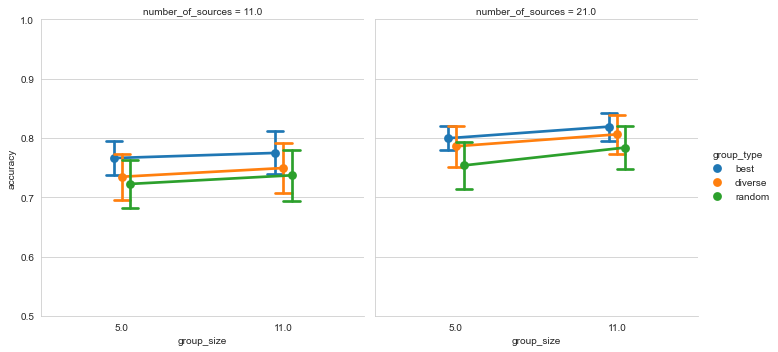

In [7]:
# df_plot = df_groups.loc[(df_groups["number_of_sources"]==11) & (df_groups["source_degree"]==5)]
# df_plot = df_groups.loc[df_groups["group_size"]==20]
params = {
    "data": df_groups,
    "x": "group_size",
    "y": "accuracy",
    "hue": "group_type",
    "errorbar": "sd",
    "capsize": 0.1,
    "dodge": 0.1,
    "kind": "point",
    "col": "number_of_sources",
#     "row": "group_size",
}
sns.set_style("whitegrid")
ax = sns.catplot(**params)

if params["y"] == "accuracy":
    ax.set(ylim=(0.5, 1))

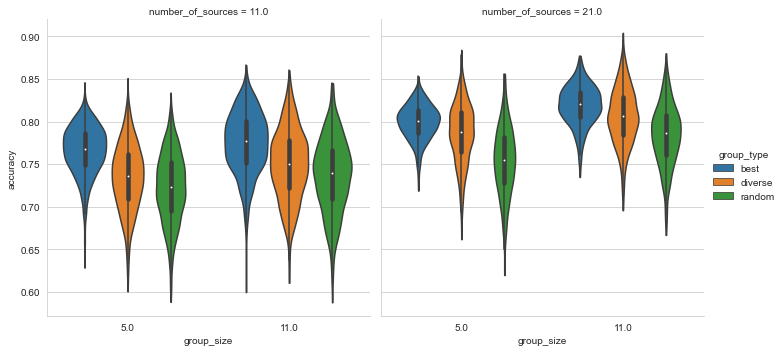

In [8]:
sns.catplot(
    data=df_groups, 
    x="group_size", 
    y="accuracy", 
    hue = "group_type",
    capsize=0.1,
    kind="violin",
    cut=0,
#     inner=None,
    orient="v",
#     split=True,
    col="number_of_sources",
    
)

### 2.2 Average Ability

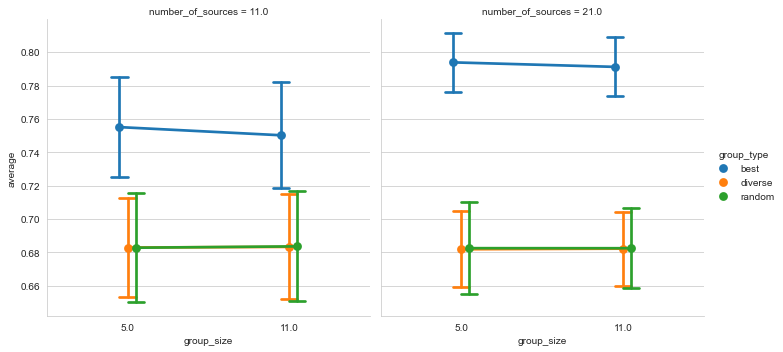

In [9]:
params = {
    "data": df_groups,
    "x": "group_size",
#     x: "group_type",
#     join: False,
#     "y": "diversity",
    "y": "average",
    "hue": "group_type",
    "errorbar": "sd",
    "capsize": 0.1,
    "dodge": 0.1,
    "kind": "point",
    "col": "number_of_sources",
}
sns.set_style("whitegrid")
ax = sns.catplot(**params)

if params["y"] == "accuracy":
    ax.set(ylim=(0.5, 1))

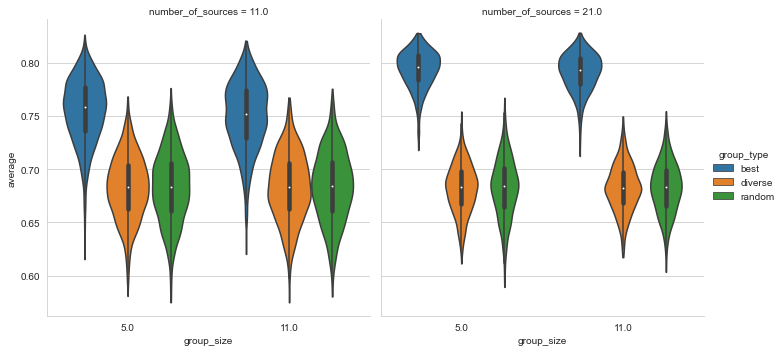

In [13]:
sns.catplot(
    data=df_groups, 
    x="group_size", 
    y="average", 
    hue = "group_type",
    capsize=0.1,
    kind="violin",
    cut=0,
#     inner=None,
    orient="v",
#     split=True,
    col="number_of_sources",
    
)

### 2.3 Team Diversity

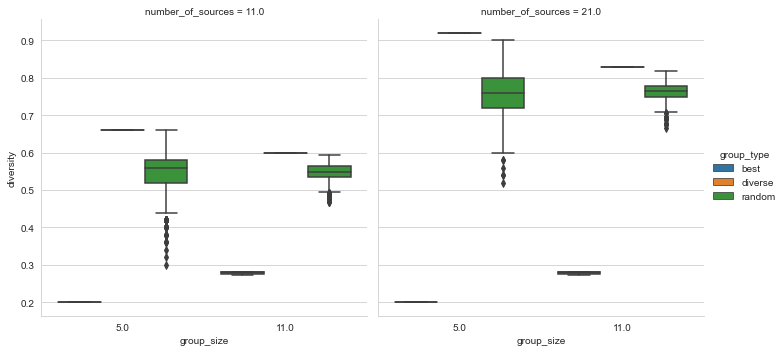

In [10]:
sns.set_style("whitegrid")

boxplot = sns.catplot(
    data=df_groups,
    x="group_size",
    y="diversity",    
    kind="box", 
    hue="group_type",
    col="number_of_sources",
#     cmap="jet",
#     title="Best, random and diverse groups",
#     ylim=(0.5,1),
#     grid=True
)  
# boxplot.set(ylim=(0.5, 1))

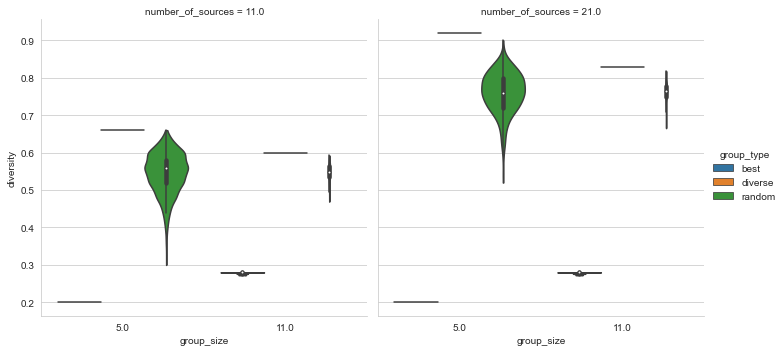

In [11]:
sns.catplot(
    data=df_groups, 
    x="group_size", 
    y="diversity", 
    hue = "group_type",
    capsize=0.1,
    kind="violin",
    cut=0,
#     inner=None,
    orient="v",
#     split=True,
    col="number_of_sources",
    
)